# Day - 10
# Date - 4 June 2019


# Statistics Fundamentals

# Task 1:
* Create a new column which describes the number of points a player scored per game during the season. The number of total points a player scored the entire season is stored in the PTS column, and the number of games played in the Games Played column. Give the new column a relevant name.


In [2]:
import pandas as pd
import numpy as np
import pprint       
def required(filename):
    df =pd.read_csv(filename)
    games_played = [df['Games Played'].values]   
    gamePlay = games_played[0]
        
    get_points = [df['PTS'].values]
    point = get_points[0]
        
    point_per_game =[]
    for i in range(0,len(point)):
        point_per_game.append('{0:.1f}'.format(point[i]/gamePlay[i]))    
    print(point_per_game)
    df['PTS_perGame'] = point_per_game
    df.to_csv(filename,index = False)
        
        
required('WNBA Stats.csv')

['11.6', '7.2', '8.4', '6.1', '2.1', '1.9', '1.5', '17.0', '13.2', '5.1', '8.1', '14.2', '2.0', '1.9', '2.0', '3.9', '1.6', '3.8', '0.6', '20.1', '7.5', '8.4', '9.5', '2.3', '13.0', '21.0', '13.2', '7.6', '17.0', '15.0', '10.4', '2.1', '3.6', '15.2', '3.8', '2.4', '4.4', '11.6', '12.9', '12.3', '8.5', '2.7', '7.5', '8.2', '18.4', '18.8', '10.6', '4.3', '14.0', '11.3', '3.4', '11.2', '5.3', '5.1', '0.9', '14.7', '2.2', '4.4', '11.7', '8.4', '7.1', '14.5', '5.9', '2.8', '1.2', '2.2', '9.2', '17.2', '4.0', '16.1', '3.3', '6.4', '5.6', '4.6', '10.6', '5.5', '15.2', '1.5', '6.9', '8.0', '5.8', '4.9', '12.0', '6.9', '0.9', '11.0', '7.8', '2.1', '8.0', '6.0', '0.3', '0.4', '5.1', '2.7', '16.9', '11.4', '5.4', '9.1', '6.9', '4.4', '4.0', '3.6', '1.9', '19.2', '2.7', '8.5', '4.8', '3.7', '3.7', '2.8', '10.7', '7.4', '6.4', '4.8', '6.2', '0.5', '3.0', '11.0', '3.4', '4.4', '11.9', '2.9', '8.4', '11.3', '18.2', '14.2', '4.6', '10.1', '11.3', '2.9', '2.2', '19.7', '8.9', '13.3', '1.0', '7.2', '7.2

# Task 2:
* Stratify the wnba data set by player position. The Pos column describes a player's position on the field. Assign each stratum to a different variable.
* Loop through the strata, and for each stratum:
  * Sample 10 observations using simple random sampling (set random_state = 0).
  * Find the mean points per game using the sample. Use the new column you've created earlier.
  * Find a way to store the mean along with its corresponding position. You can use a dictionary.


# Task 3:
Find the position that has the greatest number of points per game, and assign its name to a variable named position_most_points.

In [4]:
import pandas as pd
import numpy as np
import pprint
class basketball():
    def __init__(self,filename):
        self.df = pd.read_csv(filename)
        
    def required(self):  
        forward,guard,center,guard_forward,forward_center =[],[],[],[],[]
        position = [self.df['Pos'].values]
        pos = position[0]
        
        forward = [self.df.iat[i,32] for i in range(0,len(pos)) if self.df.iat[i,2]=='F']
        guard = [self.df.iat[i,32] for i in range(0,len(pos)) if self.df.iat[i,2]=='G']    
        center = [self.df.iat[i,32] for i in range(0,len(pos)) if self.df.iat[i,2]=='C']
        guard_forward = [self.df.iat[i,32] for i in range(0,len(pos)) if self.df.iat[i,2]=='G/F']
        forward_center = [self.df.iat[i,32] for i in range(0,len(pos)) if self.df.iat[i,2]=='F/C']
                
        sample_f = pd.Series(forward).sample(n=10, random_state=0)
        sample_g = pd.Series(guard).sample(n=10, random_state=0)
        sample_c = pd.Series(center).sample(n=10, random_state=0)
        sample_gf = pd.Series(guard_forward).sample(n=10, random_state=0)
        sample_fc = pd.Series(forward_center).sample(n=10, random_state=0)
        
        f=list(sample_f)
        g=list(sample_g)
        c=list(sample_c)
        gf=list(sample_gf)
        fc=list(sample_fc)
        
        req_mean=[]
        
        mean_f = sum(f)/len(f)
        req_mean.append(mean_f)
        mean_g = sum(g)/len(g)
        req_mean.append(mean_g)
        mean_c = sum(c)/len(c)
        req_mean.append(mean_c)
        mean_gf = sum(gf)/len(gf)
        req_mean.append(mean_gf)
        mean_fc = sum(fc)/len(fc)
        req_mean.append(mean_fc)
        
        place =['F','G','C','G/F','F/C']
        
        dict1={}
        j=0
        for i in place:
            dict1[i] = req_mean[j]
            j+=1
            
            
        print(dict1)
        position_most_point = max(dict1, key=dict1.get)
        
        print("position with most point: ",position_most_point)
series = basketball('WNBA Stats.csv')
series.required()

{'F': 8.7, 'G': 7.080000000000001, 'C': 9.84, 'G/F': 6.82, 'F/C': 9.06}
position with most point:  C


# Proportional Stratified Sampling


# Task4:
* Stratify the data set by the number of games played in the following way: the first strata should be composed of players that played 12 games or less; the second of players that played more than 12 games, but up to 22 (included); and the third of players that played more than 22 games (22 not included).



* Perform stratified sampling 100 times. For each of the 100 iterations of a forloop:
  * Sample each stratum proportionally. Sample at random: one sample observation from the first stratum, two sample observations from the second, and seven sample observations from the third stratum.
  * random_state should vary from 0 to 99: 0 for the first iteration, 99 for the last iteration.
  * Once you're done with the sampling for the current iteration of the loop, concatenate all the sample observations into one final sample. You can use pd.concat().
  * Compute the mean of the final sample, and append it to a list defined outside the loop. The mean should be for the PTS column.

# Task 5:
* Display the entire sampling process.
* Using plt.scatter(), display the sampling means on a scatter plot. Place the means on the y-axis, and the sample numbers on the x-axis (the numbers should range from 1 to 100 - both endpoints included).
* Using plt.axhline(), display the population mean for the total points in the form of a horizontal line.


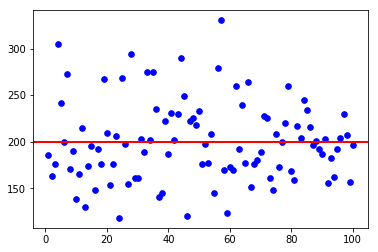

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pprint       
def required(filename):
    sample, mean = [],[]
    df =pd.read_csv(filename)
    games_played = [df['Games Played'].values]   
    gamePlay = games_played[0]
        
    less_game = [df.iat[i,29] for i in range(0,len(gamePlay)) if(df.iat[i,11] <=12)]
    med_game = [df.iat[i,29] for i in range(0,len(gamePlay)) if(df.iat[i,11] >12 and df.iat[i,11]<=22)]
    more_game = [df.iat[i,29] for i in range(0,len(gamePlay)) if(df.iat[i,11] > 22)]
    
    for i in range(0,100):
        sample1 = pd.Series(less_game).sample(n=1, random_state=i)
        sample2 = pd.Series(med_game).sample(n=2, random_state=i)
        sample3 = pd.Series(more_game).sample(n=7, random_state=i)
        sample.append(pd.concat([sample1,sample2,sample3]))
    
    for i in sample:
        mean.append(sum(i)/len(i))
    
    arealist = np.pi * 10
    x = np.arange(1,101)
    colorlist = np.random.rand(len(mean))
    plt.scatter(x,mean,s=arealist,c='#0000FF',alpha = 1) 
    plt.axhline(y=sum(mean)/len(mean),linewidth=2, color='r')
         
        
required('WNBA Stats.csv')

# Cluster Sampling 


# Task 6:
* Pick four team clusters randomly using the technique we've learned (use random_state = 0).
* Collect the data from each cluster without sampling the clusters. Create a new DataFrame object that stores the data collected from all clusters.
* Use the data collected to estimate the mean for the following player attributes:
  * Height;
  * Age;
  * BMI;
  * Total points.
* Finally, measure the sampling error of your estimates, and assign the errors to the following variables: sampling_error_height, sampling_error_age, sampling_error_BMI, sampling_error_points.


In [2]:
import pandas as pd
import numpy as np
import pprint       
def required(filename):
    df =pd.read_csv(filename)
    
    
    team_sample = pd.Series(df['Team'].unique()).sample(4, random_state = 0)
    print(team_sample)
    
    req=[]
    for i in team_sample:
        for j in range(0,len(df)):
            if(df.iat[j,1]==i):
                req.append(df.loc[j])
                
    df1 = pd.DataFrame(req)
    

    mean_height = sum(df1['Height'])/len(df1['Height'])
    mean_Age= sum(df1['Age'])/len(df1['Age'])
    mean_BMI= sum(df1['BMI'])/len(df1['BMI'])
    mean_PTS= sum(df1['PTS'])/len(df1['PTS'])

    print("Mean height: ",mean_height)
    print("Mean age : ",mean_Age)
    print("Mean BMI: ",mean_BMI)
    print("Mean points: ",mean_PTS)
    
    df['BMI'].fillna(0, inplace = True)
    
    height = sum(df['Height'])/len(df['Height'])       
    age = sum(df['Age'])/len(df['Age'])
    BMI = sum(df['BMI'])/len(df['BMI'])
    PTS =sum(df['PTS'])/len(df['PTS'])
    
    
    
    sampling_error_height = mean_height - height
    sampling_error_age = mean_Age - age
    sampling_error_BMI = mean_BMI - BMI
    sampling_error_points = mean_PTS - PTS
    
    print("Sampling error height: ",sampling_error_height)
    print("Sampling error age: ",sampling_error_age)
    print("Sampling error BMI: ",sampling_error_BMI)
    print("Sampling error points: ",sampling_error_points)
    
required('WNBA Stats.csv')

6     PHO
11    IND
4     MIN
10    ATL
dtype: object
Mean height:  184.6304347826087
Mean age :  28.47826086956522
Mean BMI:  22.86025978608696
Mean points:  229.58695652173913
Sampling error height:  0.06400121617511445
Sampling error age:  1.401337792642142
Sampling error BMI:  -0.06947741908785332
Sampling error points:  27.79674673152934
